# Practical Exam - Coffee Shops

## Instructions
- Use Python or R to perform the tasks required.
- Write your solutions in the workspace provided from your certification page.
- Include all of the visualizations you create to complete the tasks.
- Visualizations must be visible in the published version of the workspace. Links to external visualizations will not be accepted.
- You do not need to include code unless the question says you must.
- You must pass all criteria to pass this exam. The full criteria can be found here: https://app.datacamp.com/certification/resource-center/practical-hub#data-scientist-associate

## Background

Java June is a company that owns coffee shops in a number of locations in Europe.

The company knows that stores with more reviews typically get more new customers. This is because new customers consider the number of reviews when picking between two shops.
They want to get more insight into what leads to more reviews.
They are also interested in whether there is a link between the number of reviews and rating.
They want a report to answer these questions.

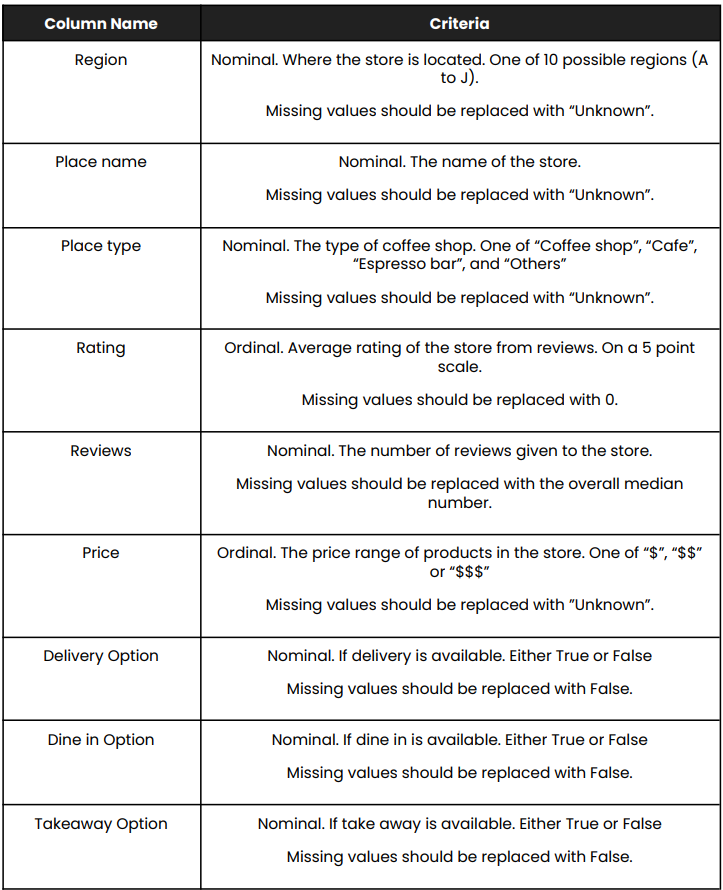

## Tasks

Submit your answers directly in the workspace provided.

1. For every column in the data:

    a. State whether the values match the description given in the table above.

    b. State the number of missing values in the column

    c. Describe what you did to make values match the description if they did not match.

2. Create a visualization that shows how many stores were given each rating. Use the visualization to:

    a. State which category of the variable rating has the most number of observations

    b. Explain whether the observations are balanced across categories

3. Describe the distribution of the number of reviews. Your answer must include a visualization that shows the distribution.

4. Describe the relationship between number of reviews and rating. Your answer must include a visualization to demonstrate the relationship.

5. The business wants to predict the number of reviews a store will get using the data provided. State the type of machine learning problem that this is (regression/classification/clustering).

6. Fit a baseline model to predict the number of reviews a store will get using the data provided. You must include your code.

7. Fit a comparison model to predict the number of reviews a store will get using the data provided. You must include your code.

8. Explain why you chose the two models used in parts 6 and 7.

9. Compare the performance of the two models used in parts 6 and 7, using any method suitable for the type of model. You must include your code.

10. Explain which model performs better and why.

## Tasks 1

1. For every column in the data:

    a. State whether the values match the description given in the table above.

    b. State the number of missing values in the column

    c. Describe what you did to make values match the description if they did not match.

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("datasets/coffee.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: bool(1), float64(2), object(6)
memory usage: 12.8+ KB


## Task 1:

I used "df['col_name'].isna().sum()" for checking missing values and "df.info()" for checking dtypes, etc.

- ['Region'] column matches the description in the table; No missing values
- ['Place name'] column also matches the description in the table; No missing values
- ['Place type'] column also matches the description in the table; No missing values
- ['Rating'] contains 2 missing values, replacing with 0 as mentioned in the table
- ['Reviews'] There were 2 missing values. I replaced them with median Reviews score
- ['Price'] column also matches the description in the table; No missing values
- ['Delivery option'] column also matches the description in the table; No missing values
- Columns ['Dine in option'] and ['Takeout option'] have 60 and 56 NaNs correspondingly. Replacing with bool type False to keep the Boolean dtype in the column

In [206]:
df['Rating'] = df['Rating'].replace(np.NaN, 0)
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())

print(df['Dine in option'].isna().sum(), df['Takeout option'].isna().sum())
# 60 missing values

60 56


In [207]:
cols = ['Dine in option', 'Takeout option']

for col in cols:
    df[col] = df[col].fillna((False))

df.info() # looking good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    float64
 5   Price            200 non-null    object 
 6   Delivery option  200 non-null    bool   
 7   Dine in option   200 non-null    bool   
 8   Takeout option   200 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 10.1+ KB


## Task 2

2. Create a visualization that shows how many stores were given each rating. Use the visualization to:

    a. State which category of the variable rating has the most number of observations

    b. Explain whether the observations are balanced across categories

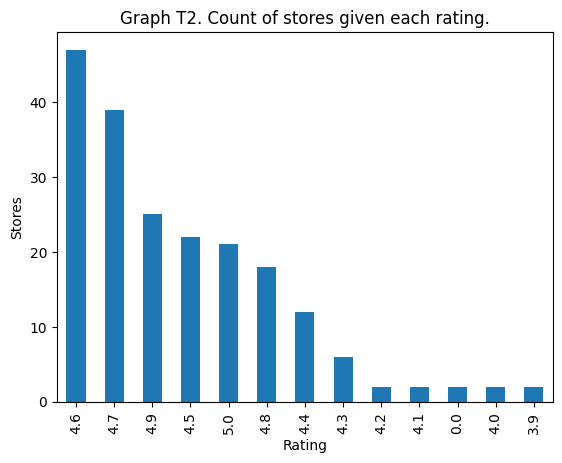

In [208]:
%matplotlib widget
%matplotlib inline
df['Rating'].value_counts().plot(kind='bar')

plt.xlabel('Rating')
plt.ylabel('Stores')
plt.title('Graph T2. Count of stores given each rating.')

plt.show()

2.a Stores are mostly rated with Rating 4.6. 

2.b The observations are not balanced across the categories of Rating for values below 4.3. Most sores are awarded rating around 4.3 to 5 with peak at 4.6.

## Task 3

3. Describe the distribution of the number of reviews. Your answer must include a visualization that shows the distribution.

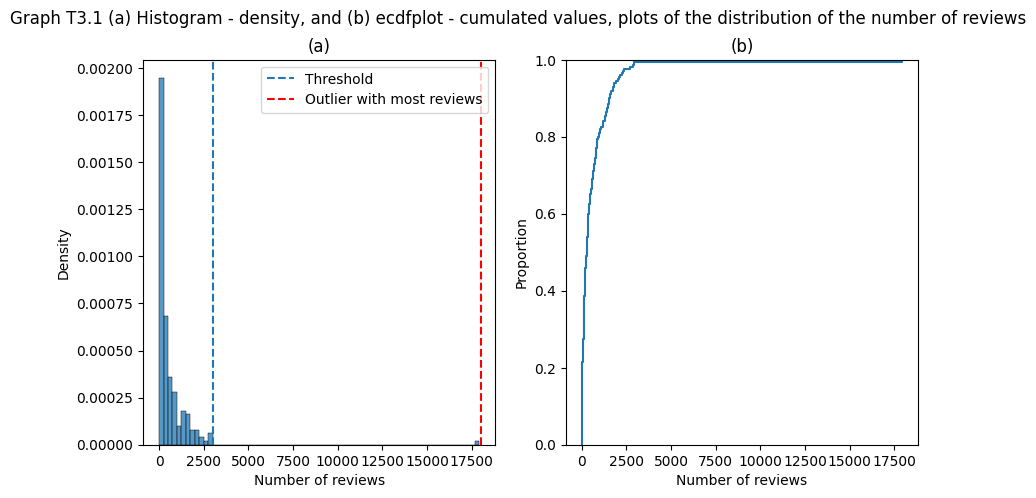

In [209]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, 
                               sharey=False, sharex=True, figsize=(10,5))
sns.histplot(df['Reviews'], stat='density', ax=ax0)
sns.ecdfplot(df['Reviews'], ax=ax1)

ax1.set(xlabel='Number of reviews')
ax0.set(xlabel='Number of reviews')

ax0.axvline(x=3000, label='Threshold', linestyle='--')
ax0.axvline(x=18000, label='Outlier with most reviews', linestyle='--', color='red')
fig.suptitle("Graph T3.1 (a) Histogram - density, and (b) ecdfplot - cumulated values, plots of the distribution of the number of reviews")
ax0.set_title('(a)')
ax1.set_title('(b)')
ax0.legend()

Getting rid of the outlier:

In [210]:
outlier = df[df['Reviews'] == df['Reviews'].max()]
print(outlier)

df['Reviews'].describe()

    Region               Place name   Place type  Rating  Reviews Price  \
100      E  Lviv Coffee Manufacture  Coffee shop     4.7  17937.0    $$   

     Delivery option  Dine in option  Takeout option  
100             True            True            True  


count      200.000000
mean       618.985000
std       1394.280842
min          3.000000
25%         48.500000
50%        271.500000
75%        780.750000
max      17937.000000
Name: Reviews, dtype: float64

### Answer, task 3

- Most stores accumulated around 600 reviews. 
- Almost all stores have less than 3000 reviews. More than 95% of values are accumulated for this threshold number of reviews (graph on the righ). 
- There most notable outlier shown on the left graph in red has 17937 reviews and is 'Lviv Coffee MAnufacture'.

#### ... but since we do not have a lot of data and we want to see what distribution the data follows we can try the log transformation on the data:

## Log-transformation:

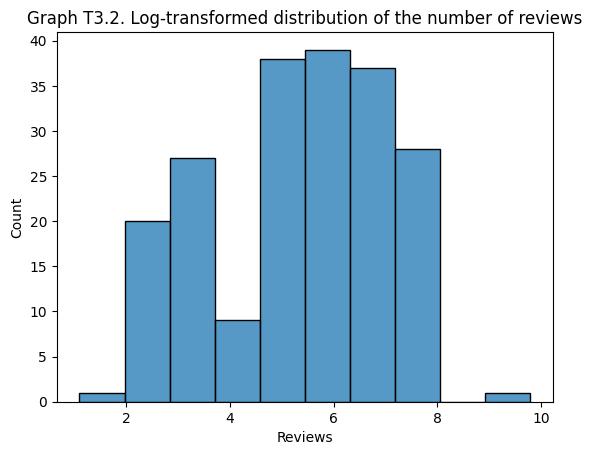

In [211]:
# Change the line plot below to a scatter plot
sns.histplot(x=np.log(df['Reviews'])).set(title='Graph T3.2. Log-transformed distribution of the number of reviews')
plt.show()

- The log-transformation shows that the number of reviews follows approximately a normal distribution


## Task 4

4. Describe the relationship between number of reviews and rating. Your answer must include a visualization to demonstrate the relationship.

In [212]:
# Removing the two outliers
df1 = df.query('Rating > 0 and Reviews < 5000')

[Text(0.5, 1.0, 'Graph T4. Relationship between number of reviews and rating (boxplot).')]

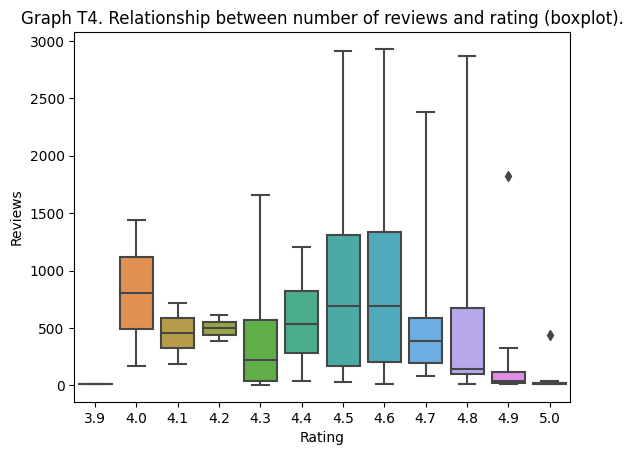

In [213]:
sns.boxplot(y='Reviews', x='Rating', data=df1, whis=10).set(title='Graph T4. Relationship between number of reviews and rating (boxplot).')

- Stores that have extremally low or extremally high overall Rating do not tend to have a lot of reviews
- However, there are some stores that have very high rating with rather high number of reviews. These are shown as outliers in the boxplot (diamond points).
- Rating of 4.5 to 4.6 is predominant and stores with that rating have usually the highest number of reviews
- There more extreme the rating usually the less variation in the number of reviews per store.

## Task 5

5. The business wants to predict the number of reviews a store will get using the data provided. State the type of machine learning problem that this is (regression/classification/clustering).


### This is a regression problem. Since the data follows approximately a normal distribution (shown using log-transformation) we can use a Linear regression model.

## Task 6

6. Fit a baseline model to predict the number of reviews a store will get using the data provided. You must include your code.

In [248]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           197 non-null    object 
 1   Place name       197 non-null    object 
 2   Place type       197 non-null    object 
 3   Rating           197 non-null    float64
 4   Reviews          197 non-null    float64
 5   Price            197 non-null    object 
 6   Delivery option  197 non-null    bool   
 7   Dine in option   197 non-null    bool   
 8   Takeout option   197 non-null    bool   
dtypes: bool(3), float64(2), object(4)
memory usage: 11.4+ KB


### Step 1: Preprocessing 

We will use df1 because I already removed the outliers here

In [249]:
# Selecting the predictors; get_dummies()
predictors = df1[['Region', 'Place type', 'Rating', 'Price', 'Delivery option', 'Dine in option', 'Takeout option']]
predictors_dummies = pd.get_dummies(predictors)

# Concatenating and dropping to get the dataset ready for the model
df_model = pd.concat([df1, predictors_dummies],axis=1)
df_model = df_model.drop(['Region', 'Place type', 'Rating', 'Price', 'Delivery option', 'Dine in option', 'Takeout option'], axis=1)
# df_model.head()

In [260]:
# Selecting the target variable: ['Reviews']
y = np.log(df_model['Reviews']).values

# Selecting the predictors
features = [feat for feat in list(df_model) if feat != 'Place name' and feat != 'Reviews']
print(features)
print(y)

['Region_A', 'Region_B', 'Region_C', 'Region_D', 'Region_E', 'Region_F', 'Region_G', 'Region_H', 'Region_I', 'Region_J', 'Place type_Cafe', 'Place type_Coffee shop', 'Place type_Espresso bar', 'Place type_Others', 'Price_$', 'Price_$$', 'Price_$$$']
[5.32787617 3.17805383 2.39789527 5.80211838 2.48490665 5.90536185
 5.29831737 5.6767538  3.4339872  4.82831374 4.71849887 2.63905733
 2.89037176 6.69208374 6.41181827 5.14749448 5.45532112 4.91265489
 5.11198779 2.30258509 7.37525578 7.48717369 6.12905021 5.79605775
 2.63905733 6.34388043 6.75693239 4.82028157 6.80017007 7.08590146
 5.84932478 2.48490665 4.71849887 2.83321334 7.22693602 3.61091791
 5.420535   6.57368017 2.7080502  2.89037176 2.7080502  6.58755001
 7.20414929 3.25809654 6.18414889 5.63121178 5.48479693 2.89037176
 3.8286414  6.37502482 6.3851944  4.63472899 7.09090982 4.20469262
 5.6167711  3.29583687 5.7170277  6.39359075 4.57471098 2.39789527
 2.48490665 2.63905733 2.7080502  3.63758616 4.58496748 4.77068462
 4.79579055 4

In [252]:
X = df_model[features].values
print(X.shape)

(197, 17)


### Step 2: Train-test split

In [261]:
# Import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 3: Fitting the model

In [263]:
# Instantiate the model
linreg = LinearRegression()

# Fit the model
linreg.fit(X_train, y_train)

# Making predictions on test set
y_pred_linreg = linreg.predict(X_test)

## Task 7

7. Fit a comparison model to predict the number of reviews a store will get using the data provided. You must include your code.

In [264]:
regtree = DecisionTreeRegressor()

regtree.fit(X_train, y_train)

y_pred_regtree = regtree.predict(X_test)

## Task 8

8. Explain why you chose the two models used in parts 6 and 7.

- I am choosing the Linear Regression model as a baseline model for linear regression problems. 
- The comparison model I am choosing is the Decision Tree Regressor because it can capture more complex relationship between the input features and the target variables.

## Task 9

9. Compare the performance of the two models used in parts 6 and 7, using any method suitable for the type of model. You must include your code.

In [277]:
# MSE is measured in the same units as the target variable BUT SQUARED, so to get RMSE I am setting squared to False
# The target variable is log-transformed, so we need to back-transform it to normal units

rmse_linreg = mean_squared_error(np.exp(y_test), np.exp(y_pred_linreg), squared=False)
rmse_regtree = mean_squared_error(np.exp(y_test), np.exp(y_pred_regtree), squared=False)

print(f"Linear Regression RMSE is: {rmse_linreg} \nDecision Tree Regressor RMSE is: {rmse_regtree}")

Linear Regression RMSE is: 688.3084848649278 
Decision Tree Regressor RMSE is: 787.4834386419927


## Task 10

10. Explain which model performs better and why.

- Linear Regression model performs better as shown with the RMSE metric. RMSE for Linear Regression model is smaller, meaning that the roof of the average squared distance between the predicted values and true values is smaller for Linear Regression model.

- It is possible that different Regression models, such as RandomForestRegressor would perform better.